## Load Data

This dataset [Electricity Load Diagrams 20112014 Data Set](https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014#) is from UCI Machine Learning Repository.

### Data Set Information:

Data set has no missing values.
Values are in kW of each 15 min. To convert values in kWh values must be divided by 4.
Each column represent one client. Some clients were created after 2011. In these cases consumption were considered zero.
All time labels report to Portuguese hour. However all days present 96 measures (24*4). Every year in March time change day (which has only 23 hours) the values between 1:00 am and 2:00 am are zero for all points. Every year in October time change day (which has 25 hours) the values between 1:00 am and 2:00 am aggregate the consumption of two hours.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip

--2022-12-14 18:29:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261335609 (249M) [application/x-httpd-php]
Saving to: ‘LD2011_2014.txt.zip’

LD2011_2014.txt.zip 100%[===================>] 249.23M  32.7MB/s    in 7.8s    

2022-12-14 18:29:57 (31.8 MB/s) - ‘LD2011_2014.txt.zip’ saved [261335609/261335609]



In [3]:
!unzip LD2011_2014.txt.zip

Archive:  LD2011_2014.txt.zip
  inflating: LD2011_2014.txt         
   creating: __MACOSX/
  inflating: __MACOSX/._LD2011_2014.txt  


In [4]:
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip'
df = pd.read_csv("LD2011_2014.txt", sep = ';', index_col = 0, dtype=str)

In [5]:
print(df.shape)

(140256, 370)


In [6]:
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 00:30:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 00:45:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:15:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.tail()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2014-12-31 23:00:00,"2,53807106598985","22,0483641536273","1,73761946133797","150,406504065041","85,3658536585366","303,571428571429","11,3058224985868","282,828282828283","68,1818181818182","72,0430107526882",...,"276,945039257673",28200,"1616,03375527426","1363,63636363636","29,986962190352","5,85137507314219","697,102721685689","176,961602671119","651,026392961877","7621,62162162162"
2014-12-31 23:15:00,"2,53807106598985","21,3371266002845","1,73761946133797","166,666666666667","81,7073170731707","324,404761904762","11,3058224985868","252,525252525253","64,6853146853147","72,0430107526882",...,"279,800142755175",28300,"1569,62025316456","1340,90909090909","29,986962190352","9,94733762434172","671,641791044776","168,614357262104","669,354838709677","6702,7027027027"
2014-12-31 23:30:00,"2,53807106598985","20,6258890469417","1,73761946133797","162,60162601626","82,9268292682927","318,452380952381","10,1752402487281","242,424242424242","61,1888111888112","74,1935483870968",...,"284,796573875803",27800,"1556,96202531646","1318,18181818182","27,3794002607562","9,3622001170275","670,763827919227","153,589315525876","670,087976539589","6864,86486486487"
2014-12-31 23:45:00,"1,26903553299492","21,3371266002845","1,73761946133797","166,666666666667","85,3658536585366","285,714285714286","10,1752402487281","225,589225589226","64,6853146853147","72,0430107526882",...,"246,252676659529",28000,"1443,03797468354","909,090909090909","26,0756192959583","4,09596255119953","664,618086040386","146,911519198664","646,627565982405","6540,54054054054"
2015-01-01 00:00:00,"2,53807106598985","19,9146514935989","1,73761946133797","178,861788617886","84,1463414634146","279,761904761905","10,1752402487281","249,158249158249","62,9370629370629","69,8924731182796",...,"188,436830835118",27800,"1409,28270042194","954,545454545455","27,3794002607562","4,09596255119953","628,621597892889","131,886477462437","673,020527859238","7135,13513513513"


# Data processing & Pre-Modeling

TODO: FB Prophet, split subsets

## Data Cleaning

- Melt the wide data matrix to long data matrix
- Convert index to timestamps, entries to numeric

In [11]:
df.tail()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2014-12-31 23:00:00,"2,53807106598985","22,0483641536273","1,73761946133797","150,406504065041","85,3658536585366","303,571428571429","11,3058224985868","282,828282828283","68,1818181818182","72,0430107526882",...,"276,945039257673",28200,"1616,03375527426","1363,63636363636","29,986962190352","5,85137507314219","697,102721685689","176,961602671119","651,026392961877","7621,62162162162"
2014-12-31 23:15:00,"2,53807106598985","21,3371266002845","1,73761946133797","166,666666666667","81,7073170731707","324,404761904762","11,3058224985868","252,525252525253","64,6853146853147","72,0430107526882",...,"279,800142755175",28300,"1569,62025316456","1340,90909090909","29,986962190352","9,94733762434172","671,641791044776","168,614357262104","669,354838709677","6702,7027027027"
2014-12-31 23:30:00,"2,53807106598985","20,6258890469417","1,73761946133797","162,60162601626","82,9268292682927","318,452380952381","10,1752402487281","242,424242424242","61,1888111888112","74,1935483870968",...,"284,796573875803",27800,"1556,96202531646","1318,18181818182","27,3794002607562","9,3622001170275","670,763827919227","153,589315525876","670,087976539589","6864,86486486487"
2014-12-31 23:45:00,"1,26903553299492","21,3371266002845","1,73761946133797","166,666666666667","85,3658536585366","285,714285714286","10,1752402487281","225,589225589226","64,6853146853147","72,0430107526882",...,"246,252676659529",28000,"1443,03797468354","909,090909090909","26,0756192959583","4,09596255119953","664,618086040386","146,911519198664","646,627565982405","6540,54054054054"
2015-01-01 00:00:00,"2,53807106598985","19,9146514935989","1,73761946133797","178,861788617886","84,1463414634146","279,761904761905","10,1752402487281","249,158249158249","62,9370629370629","69,8924731182796",...,"188,436830835118",27800,"1409,28270042194","954,545454545455","27,3794002607562","4,09596255119953","628,621597892889","131,886477462437","673,020527859238","7135,13513513513"


In [8]:
def preprocessing(dataframe):
    # convert index (timestamp) to a new column
    dataframe = dataframe.reset_index().rename(columns={"index": "timestamp"})

    # unpivot the data
    dataframe = dataframe.melt(id_vars=['timestamp'], var_name='user', value_name='usage_per_15min')
    # fix the timestamp
    dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'], format = '%Y-%m-%d %H:%M:%S')
    # fix electricity usage
    dataframe['usage_per_15min'] = dataframe['usage_per_15min'].apply(lambda x: str(x).replace(',', '.')).astype(float)

    return dataframe

df = preprocessing(df)

In [9]:
def aggregate_date(dataframe):
    dataframe['date'] = pd.to_datetime((dataframe.timestamp - np.timedelta64(1, 'm')).dt.date)
    dataframe_day = dataframe.groupby(['user', 'date']).sum().reset_index()
    dataframe_day = dataframe_day.rename(columns={'usage_per_15min': 'sum_per_day'})
    dataframe_day['std_per_day'] = dataframe.groupby(['user', 'date']).std().reset_index().usage_per_15min

    return dataframe_day

df_day = aggregate_date(df)
df_day.head()

,user,date,sum_per_day,std_per_day
0,MT_001,2011-01-01,0.0,0.0
1,MT_001,2011-01-02,0.0,0.0
2,MT_001,2011-01-03,0.0,0.0
3,MT_001,2011-01-04,0.0,0.0
4,MT_001,2011-01-05,0.0,0.0


In [22]:
df_day.tail

<bound method NDFrame.tail of           user       date   sum_per_day  std_per_day
0       MT_001 2011-01-01  0.000000e+00     0.000000
1       MT_001 2011-01-02  0.000000e+00     0.000000
2       MT_001 2011-01-03  0.000000e+00     0.000000
3       MT_001 2011-01-04  0.000000e+00     0.000000
4       MT_001 2011-01-05  0.000000e+00     0.000000
...        ...        ...           ...          ...
540565  MT_370 2014-12-27  1.439351e+06  1242.717435
540566  MT_370 2014-12-28  1.556000e+06  1805.675897
540567  MT_370 2014-12-29  1.805676e+06  1658.016491
540568  MT_370 2014-12-30  1.867514e+06  1194.166998
540569  MT_370 2014-12-31  1.355892e+06  3819.896087

[540570 rows x 4 columns]>

user
MT_012    605
MT_015    629
MT_030    493
MT_039    640
MT_041    620
MT_092    395
MT_106    743
MT_107    743
MT_108    743
MT_109    778
MT_110    743
MT_111    743
MT_112    772
MT_113    743
MT_115    743
MT_116    778
MT_117    743
MT_120    743
MT_121    743
MT_122    743
MT_133    801
MT_160    764
MT_165    612
MT_170    423
MT_178    929
MT_179    719
MT_181    794
MT_185    536
MT_186    633
MT_223    829
MT_224    539
MT_289    697
MT_305    707
MT_322    606
MT_337    747
MT_347    622
Name: sum_per_day, dtype: int64


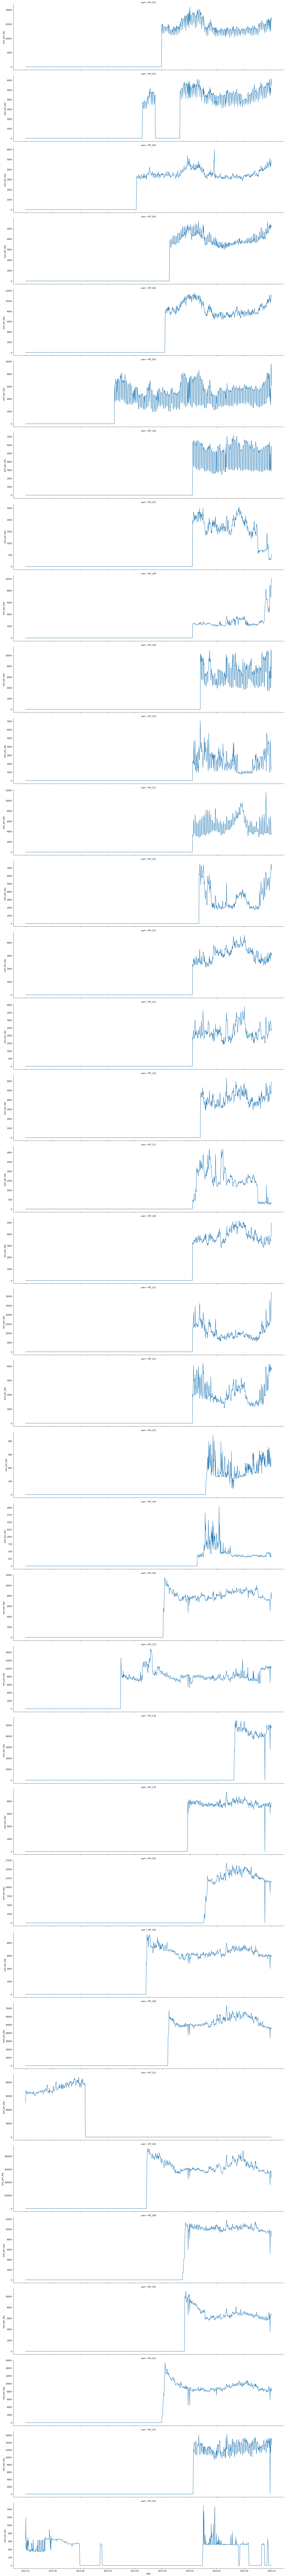

In [10]:
def cleaning(dataframe, threshold=90):
    dataframe = dataframe.copy(deep=True)
    dataframe = dataframe[dataframe.date.dt.year >= 2012]
    # remove the extra day in leap year
    dataframe = dataframe[dataframe.date != pd.to_datetime('20120229')]

    # find users that are active since 2012
    # active_user = [user for user in dataframe.user.unique() if dataframe[(dataframe.user==user) * (dataframe.date==pd.to_datetime('20120101'))].sum_per_day.item() > 0]
    # dataframe = dataframe[dataframe.user.isin(active_user)]

    def without_leading_consecutive_zeros(dataframe, threshold, by="user", col="sum_per_day"):
        # reference: https://datascience.stackexchange.com/questions/20587/find-the-consecutive-zeros-in-a-dataframe-and-do-a-conditional-replacement
        group = dataframe.groupby(by=by)[col].apply(lambda x: (~((x == x.shift()) & (x == 0))).cumsum())
        mask = dataframe[col].groupby(group).transform('count').lt(threshold)
        mask |= (group != 1)
        return mask

    # mask = without_leading_consecutive_zeros(dataframe, threshold)
    # print(f'dropping {(~mask).sum()} rows with leading zeros...')
    # dataframe = dataframe.loc[mask, :]

    # count 0 usage days
    zero_count = dataframe.groupby('user')['sum_per_day'].apply(lambda x: np.sum(x == 0))
    abnormal = zero_count[zero_count > 370]
    print(abnormal)

    sns.relplot(data=dataframe[dataframe.user.isin(abnormal.index)], 
            x="date", y="sum_per_day", row="user",
            kind="line", aspect=4, facet_kws={'sharey': False})

    dataframe = dataframe[~dataframe.user.isin(abnormal.index)]

    return dataframe


df_day_clean = cleaning(df_day)

## Split data

ex. lag, rolling statistics ... 

In [ ]:
#df_day_feat.columns

In [ ]:
#df_day_clean.tail()

In [11]:
# train-test-split
# 80-20 split

train_test_cutoff = pd.to_datetime('20140401')

train_start = df['timestamp'].min()
train_end = train_test_cutoff
test_start = train_test_cutoff
test_end = df['timestamp'].max()

df_train = df_day_clean.query("date < @train_test_cutoff").reset_index()
df_test = df_day_clean.query("date >= @train_test_cutoff").reset_index()

In [12]:
print("Train-Test Cutoff: {}".format(train_test_cutoff))
print(
    "training set: {},\ntest set:{}".format(df_train.shape, df_test.shape)
)

print("Percentage of data that is reserved for test: ", df_test.shape[0] / (df_train.shape[0] + df_test.shape[0]))

Train-Test Cutoff: 2014-04-01 00:00:00
training set: (273880, 5),
test set:(91850, 5)
Percentage of data that is reserved for test:  0.2511415525114155


In [26]:
df_train.head()

,index,user,date,sum_per_day,std_per_day
0,365,MT_001,2012-01-01,715.736041,5.866965
1,366,MT_001,2012-01-02,1025.380711,7.726193
2,367,MT_001,2012-01-03,1040.609137,7.358141
3,368,MT_001,2012-01-04,1095.177665,7.545991
4,369,MT_001,2012-01-05,1351.522843,6.674789


In [13]:
wide_df_train = df_train.pivot_table(index="user", columns="date", values="sum_per_day")\
    .dropna(axis=0)

valid_users = wide_df_train.index
valid_users

Index(['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006', 'MT_007',
       'MT_008', 'MT_009', 'MT_010',
       ...
       'MT_361', 'MT_362', 'MT_363', 'MT_364', 'MT_365', 'MT_366', 'MT_367',
       'MT_368', 'MT_369', 'MT_370'],
      dtype='object', name='user', length=334)

In [28]:
# results from local
labels = np.array([
    2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 
    2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 
    2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 
    1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 
    2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 
    1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2
])
labels

array([2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,

In [29]:
from IPython.core.display import HTML

user_clusters = pd.DataFrame(zip(valid_users, labels), columns=["user", "cluster"])

display(HTML(user_clusters.to_html()))

display_cluster = user_clusters.copy(deep=True)
display_cluster["idx"] = display_cluster.sort_values(["user", "cluster"]).groupby("cluster").cumcount()
display_cluster = pd.pivot_table(data=display_cluster, index="idx", columns="cluster", values="user", aggfunc=lambda x: ' '.join(x), fill_value="").add_prefix("cluster_")
display(HTML(display_cluster.to_html()))

,user,cluster
0,MT_001,2
1,MT_002,0
2,MT_003,1
3,MT_004,2
4,MT_005,2
5,MT_006,2
6,MT_007,2
7,MT_008,1
8,MT_009,2
9,MT_010,2


cluster,cluster_0,cluster_1,cluster_2
idx,,,
0,MT_002,MT_003,MT_001
1,MT_055,MT_008,MT_004
2,MT_091,MT_013,MT_005
3,MT_098,MT_022,MT_006
4,MT_099,MT_023,MT_007
5,MT_100,MT_029,MT_009
6,MT_101,MT_036,MT_010
7,MT_102,MT_040,MT_011
8,MT_103,MT_045,MT_014


In [ ]:
df_train_with_cluster = df_train.merge(user_clusters, on='user')
df_test_with_cluster = df_test.merge(user_clusters, on='user')
df_train_with_cluster.head(10)

# Helper functions

In [ ]:
# Plot prediction for user x

def plot_prediction(df, user = 'MT_001', target = "sum_per_day", time_interval = (20110102, 20150101)):
    #time_start = time_interval[0]
    #time_end = time_interval[1]
    ## subset time range
    #temp_df = dataframe.query("@time_start <= date <= @time_end").copy()
    #temp_df = temp_df.query("user == @user")
    # inference
    #y_hat = model.predict(temp_df[features])
    # plot
    df_filtered = df[df['user'] == user]
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(df_filtered['date'], df_filtered['yhat'], label='prediction')
    ax.plot(df_filtered['date'], df_filtered[target], label='actual', linestyle='-.', color='red')

    ax.set_xlabel("date")
    ax.set_ylabel("sum_per_day")
    ax.legend()
    
def plot_error(dataframe, model, user = 'MT_001', time_interval = (20110102, 20150101)):
    time_start = time_interval[0]
    time_end = time_interval[1]
    # subset time range
    temp_df = dataframe.query("@time_start <= date <= @time_end").copy()
    temp_df = temp_df.query("user == @user")
    # inference
    y_hat = model.predict(temp_df[features])
    # plot
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(temp_df['date'], y_hat - temp_df[target], label='residual')

    ax.set_xlabel("date")
    ax.set_ylabel("prediction_error")
    ax.legend()

#plot_error(df_test, lr, user = user, time_interval = (pd.to_datetime("20130801"), pd.to_datetime("20130831")))
#plot_prediction(df_test, lr, user = user, time_interval = (pd.to_datetime("20130801"), pd.to_datetime("20130831")))

In [ ]:
def mean_residual_per_day(dataframe, y_hat, y, user = 'All', time_interval = (20110102, 20150101), ax = None, label = None):
    time_start = time_interval[0]
    time_end = time_interval[1]

    # subset time range
    temp_df = dataframe.query("@time_start <= date <= @time_end").copy()
    if user != 'All' and user[:2] == 'MT':
        temp_df = temp_df.query("user == @user")

    # temp_df['date'] = temp_df['timestamp'].dt.date

    # inference
    temp_df['residual'] = np.abs(y_hat - y)
    
    # plot
    if ax is None:
        raise ValueError("ax is None")
    
    ax.plot(temp_df.groupby('date')['residual'].mean().index, temp_df.groupby('date')['residual'].mean().values, label=label)




In [ ]:
def train_test_split_by_cluster(df_train, df_test, cluster_index, target, shuffle=True):
    df_train_subset = df_train.query("cluster == @cluster_index")
    df_test_subset = df_test.query("cluster == @cluster_index")

    if shuffle:
        df_train_subset = df_train_subset.sample(frac=1, random_state=0).reset_index(drop=True)
        df_test_subset = df_test_subset.sample(frac=1, random_state=0).reset_index(drop=True)

    X_train = df_train_subset.drop(target, axis = 1)
    y_train = df_train_subset[target]
    X_test = df_test_subset.drop(target, axis = 1)
    y_test = df_test_subset[target]
    
    return X_train, X_test, y_train, y_test

# Modeling


In [14]:
from prophet import Prophet

import time


In [ ]:

df_train_stripped = df_train[["date","sum_per_day"]] #prophet just needs date and y
df_train_stripped.columns = ["ds", "y"] #it is strict on colnames

df_train_stripped.head()

model = Prophet(interval_width=0.95)

#benchmark training time
train_start_bench = time.time()

model.fit(df_train_stripped) #train the model


train_end_bench = time.time()
train_time = train_end_bench - train_start_bench


print(f"(Training time:{train_time: .2f} seconds or{train_time/60: .2f} minutes)")

# create predictions for the dates in the training set
df_train_dates = df_train.date.unique()

df_train_dates = pd.DataFrame({"ds": df_train_dates})

df_train_pred = model.predict(df_train_dates)
df_train_pred = df_train_pred.rename(columns = {"ds": "date"})

df_train_combined = df_train.merge(df_train_pred, how = 'left', on = 'date')


# create predictions for the dates in the test set

df_test_dates = df_test.date.unique()

df_test_dates = pd.DataFrame({"ds": df_test_dates})

df_test_pred = model.predict(df_test_dates)
df_test_pred = df_test_pred.rename(columns = {"ds": "date"})

df_test_combined = df_test.merge(df_test_pred, how = 'left', on = 'date')

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

# output MAPE
print("Train MAPE: ", mean_absolute_percentage_error(df_train_combined[['yhat']], df_train_combined[['sum_per_day']]))

print("Train RMSE: ", mean_squared_error(df_train_combined[['yhat']], df_train_combined[['sum_per_day']], squared=False))

print("Test MAPE: ", mean_absolute_percentage_error(df_test_combined[['yhat']], df_test_combined[['sum_per_day']]))

print("Test RMSE: ", mean_squared_error(df_test_combined[['yhat']], df_test_combined[['sum_per_day']], squared=False))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/z5eliavy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/thb8dlsq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91765', 'data', 'file=/tmp/tmpcn_yvaxi/z5eliavy.json', 'init=/tmp/tmpcn_yvaxi/thb8dlsq.json', 'output', 'file=/tmp/tmpcn_yvaxi/prophet_modeldf4qf5kc/prophet_model-20221213213127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:31:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:31:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


(Training time: 40.94 seconds or 0.68 minutes)
Train MAPE:  1.2678736366733123
Train RMSE:  313115.2910671484
Test MAPE:  1.1864817020833012
Test RMSE:  297328.7584499132


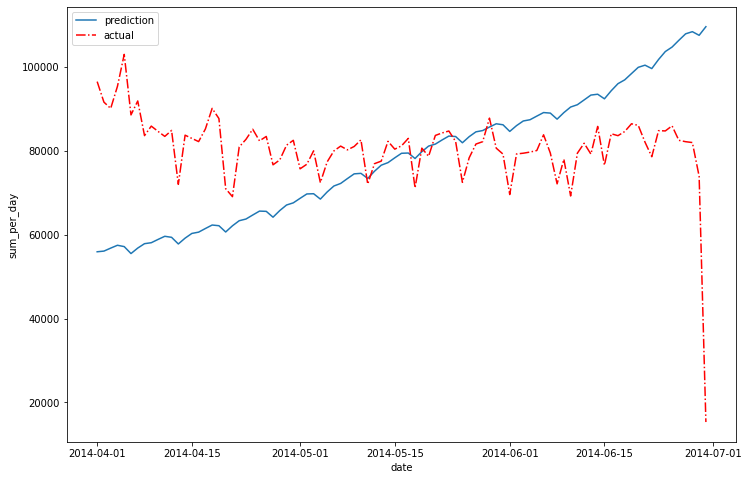

In [ ]:
# viz to see how it fit
plot_prediction(df = df_test_combined, user = "MT_049", target = "sum_per_day", time_interval = (pd.to_datetime("20130801"), pd.to_datetime("20130831")))


In [ ]:
# calculate MAPE in the 3-part segmented dates, 3-months each

print(df_train_combined.columns)

df_test_1st =  df_test_combined[(df_test_combined['date'] >= "20140401") & (df_test_combined['date'] < "20140701")]
df_test_2nd =  df_test_combined[(df_test_combined['date'] >= "20140701") & (df_test_combined['date'] < "20141001")]
df_test_3rd =  df_test_combined[(df_test_combined['date'] >= "20141001") & (df_test_combined['date'] < "20141231")]



print("Test 1st MAPE: ", mean_absolute_percentage_error(df_test_1st[['yhat']], df_test_1st[['sum_per_day']]))
print("Test 2nd MAPE: ", mean_absolute_percentage_error(df_test_2nd[['yhat']], df_test_2nd[['sum_per_day']]))
print("Test 3rd MAPE: ", mean_absolute_percentage_error(df_test_3rd[['yhat']], df_test_3rd[['sum_per_day']]))





Index(['index', 'user', 'date', 'sum_per_day', 'std_per_day', 'trend',
       'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')
Test 1st MAPE:  1.1864817020833012


ValueError: ignored

### Clustered Testing

In [ ]:
preds = []
start_time = time.time()

k = 3

train_start_bench = time.time()

for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split_by_cluster(df_train_with_cluster, df_test_with_cluster, cluster_index=i, target='sum_per_day')


    df_train_stripped = X_train[["date"]]
    df_train_stripped["y"] = y_train.values
    
    df_train_stripped.columns = ["ds", "y"]


    model = Prophet(interval_width=0.95)

    model.fit(df_train_stripped)



    df_train_dates = df_train_stripped.ds.unique()

    df_train_dates = pd.DataFrame({"ds": df_train_dates})

    df_train_pred = model.predict(df_train_dates)
    df_train_pred = df_train_pred.rename(columns = {"ds": "date"})

    df_train_combined = df_train.merge(df_train_pred, how = 'left', on = 'date')



    df_test_dates = df_test.date.unique()

    df_test_dates = pd.DataFrame({"ds": df_test_dates})

    df_test_pred = model.predict(df_test_dates)
    df_test_pred = df_test_pred.rename(columns = {"ds": "date"})

    df_test_combined = df_test.merge(df_test_pred, how = 'left', on = 'date')    

    preds.append(df_test_combined)

    print("Train MAPE: ", mean_absolute_percentage_error(df_train_combined[['yhat']], df_train_combined[['sum_per_day']]))

    print("Train RMSE: ", mean_squared_error(df_train_combined[['yhat']], df_train_combined[['sum_per_day']], squared=False))

    print("Test MAPE: ", mean_absolute_percentage_error(df_test_combined[['yhat']], df_test_combined[['sum_per_day']]))

    print("Test RMSE: ", mean_squared_error(df_test_combined[['yhat']], df_test_combined[['sum_per_day']], squared=False))



train_end_bench = time.time()
train_time = train_end_bench - train_start_bench


print(f"(Training time:{train_time: .2f} seconds or{train_time/60: .2f} minutes)")

    

<ipython-input-72-b920ebc301ae>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_stripped["y"] = y_train.values
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/j74_xnes.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/2npbhzgx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24052', 'data', 'file=/tmp/tmpcn_yvaxi/j74_xnes.json', 'init=/tmp/tmpcn_yvaxi/2npbhzgx.json', 'output', 'file=/tmp/tmpcn_yvaxi/prophet_modeluvclt5a7/prophet_model-20221213213238.csv', 'method=optimize', 'algor

Train MAPE:  1.0962177948787468
Train RMSE:  314642.3210755499
Test MAPE:  1.1339726240397692
Test RMSE:  297795.2591173252


DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/grjy_zk9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/y8ieebhj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23790', 'data', 'file=/tmp/tmpcn_yvaxi/grjy_zk9.json', 'init=/tmp/tmpcn_yvaxi/y8ieebhj.json', 'output', 'file=/tmp/tmpcn_yvaxi/prophet_model15z5fh3u/prophet_model-20221213213248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:32:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:32:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-72-b920ebc301ae>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Train MAPE:  3.0237570404517795
Train RMSE:  316133.79345300613
Test MAPE:  3.1543688431548613
Test RMSE:  299787.277810681


DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/2sykmk2g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/dh1r3o5v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4656', 'data', 'file=/tmp/tmpcn_yvaxi/2sykmk2g.json', 'init=/tmp/tmpcn_yvaxi/dh1r3o5v.json', 'output', 'file=/tmp/tmpcn_yvaxi/prophet_modeln3nes194/prophet_model-20221213213259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:32:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:33:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Train MAPE:  3.518322558616943
Train RMSE:  315849.45148857526
Test MAPE:  1.9701091737908396
Test RMSE:  298174.24547493807
(Training time: 50.00 seconds or 0.83 minutes)


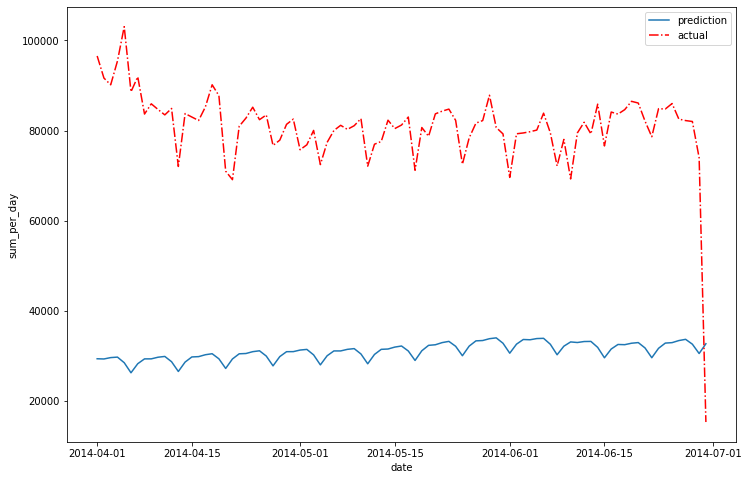

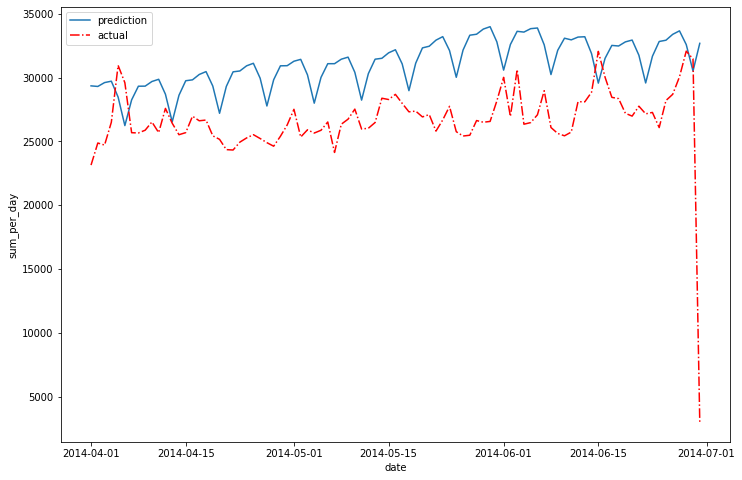

In [ ]:
cluster_2_df = preds[2]
cluster_0_df = preds[0]

plot_prediction(df = cluster_2_df, user = "MT_049", target = "sum_per_day", time_interval = (pd.to_datetime("20130801"), pd.to_datetime("20130831")))
plot_prediction(df = cluster_2_df, user = "MT_346", target = "sum_per_day", time_interval = (pd.to_datetime("20130801"), pd.to_datetime("20130831")))


## Single User

In [16]:
# number of users
len(df_train['user'].unique())

334

In [17]:
# sample 50 users
n_sample = 50

np.random.seed(2022)
users = np.random.choice(df_train['user'].unique(), n_sample)
users

array(['MT_252', 'MT_203', 'MT_134', 'MT_207', 'MT_272', 'MT_021',
       'MT_027', 'MT_168', 'MT_345', 'MT_332', 'MT_324', 'MT_317',
       'MT_013', 'MT_172', 'MT_148', 'MT_054', 'MT_172', 'MT_196',
       'MT_365', 'MT_306', 'MT_162', 'MT_104', 'MT_018', 'MT_176',
       'MT_087', 'MT_245', 'MT_276', 'MT_243', 'MT_014', 'MT_336',
       'MT_273', 'MT_097', 'MT_082', 'MT_103', 'MT_302', 'MT_370',
       'MT_058', 'MT_333', 'MT_059', 'MT_222', 'MT_336', 'MT_069',
       'MT_313', 'MT_043', 'MT_024', 'MT_067', 'MT_235', 'MT_052',
       'MT_357', 'MT_143'], dtype=object)

In [26]:
# get all users
users = df_train['user'].unique()

In [24]:
mape_scores = [0, 0, 0]

mth_end = [30, 60, 90]

In [25]:
from sklearn.metrics import mean_absolute_percentage_error

In [27]:
# train model on each user, add to mape score

for user in users:
  # get train/test data
  df_user_train = df_train[df_train['user']==user]
  df_user_test = df_test[df_test['user']==user]

  # df_user_train.shape, df_user_test.shape

  # change labels
  df_user_train_stripped = df_user_train[['date', 'sum_per_day']]
  df_user_test_stripped = df_user_test[['date', 'sum_per_day']]

  df_user_train_stripped.columns = ["ds", "y"] #it is strict on colnames
  df_user_test_stripped.columns = ["ds", "y"] #it is strict on colnames

  # fit model
  model = Prophet(interval_width=0.95)
  model.fit(df_user_train_stripped)

  # create predictions for the dates in the test set
  df_test_dates = df_user_test.date.unique()
  df_test_dates = pd.DataFrame({"ds": df_test_dates})
  df_test_pred = model.predict(df_test_dates)

  y_true = df_user_test_stripped[['y']]
  y_pred = df_test_pred[['yhat']]

  # evaluate performance by month
  for i, idx in enumerate(mth_end):
    mape = mean_absolute_percentage_error(y_true[:idx], y_pred[:idx])
    mape_scores[i] += mape


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt7fma39f/o4nb_3je.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt7fma39f/x3z4rv6l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21610', 'data', 'file=/tmp/tmpt7fma39f/o4nb_3je.json', 'init=/tmp/tmpt7fma39f/x3z4rv6l.json', 'output', 'file=/tmp/tmpt7fma39f/prophet_modelcycfhwy7/prophet_model-20221214183415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt7f

In [40]:
# calculate average mape scores for 50 users
scores = np.array(mape_scores)
scores /= len(users)
scores

array([0.10962272, 0.11800329, 0.13311748])

In [28]:
# calculate average mape scores for all users
scores = np.array(mape_scores)
scores /= len(users)
scores

array([0.36657563, 0.37549494, 0.38456711])

## Single User Test

In [ ]:
user = np.random.choice(df_train['user'].unique(), 1)
user[0]

'MT_212'

In [ ]:
df_user_train = df_train[df_train['user']==user[0]]
df_user_test = df_test[df_test['user']==user[0]]

df_user_train.shape, df_user_test.shape

((820, 5), (91, 5))

In [ ]:
df_user_train.head()

,index,user,date,sum_per_day,std_per_day
149240,269812,MT_212,2012-01-01,15790.697674,10.135609
149241,269813,MT_212,2012-01-02,31844.961240,108.088621
149242,269814,MT_212,2012-01-03,31317.829457,109.129683
149243,269815,MT_212,2012-01-04,31821.705426,107.788738
149244,269816,MT_212,2012-01-05,31883.720930,106.249505


In [ ]:
df_user_train_stripped = df_user_train[['date', 'sum_per_day']]
df_user_test_stripped = df_user_test[['date', 'sum_per_day']]

df_user_train_stripped.columns = ["ds", "y"] #it is strict on colnames
df_user_test_stripped.columns = ["ds", "y"] #it is strict on colnames

In [ ]:
# train model
model = Prophet(interval_width=0.95)

model.fit(df_user_train_stripped)

# create predictions for the dates in the training set
df_train_dates = df_user_train.date.unique()

df_train_dates = pd.DataFrame({"ds": df_train_dates})

df_train_pred = model.predict(df_train_dates)
df_train_pred = df_train_pred.rename(columns = {"ds": "date"})

df_train_combined = df_train.merge(df_train_pred, how = 'left', on = 'date')


# create predictions for the dates in the test set

df_test_dates = df_user_test.date.unique()

df_test_dates = pd.DataFrame({"ds": df_test_dates})

df_test_pred = model.predict(df_test_dates)
df_test_pred = df_test_pred.rename(columns = {"ds": "date"})

df_test_combined = df_test.merge(df_test_pred, how = 'left', on = 'date')

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

# output MAPE
print("Train MAPE: ", mean_absolute_percentage_error(df_train_combined[['yhat']], df_train_combined[['sum_per_day']]))

print("Train RMSE: ", mean_squared_error(df_train_combined[['yhat']], df_train_combined[['sum_per_day']], squared=False))

print("Test MAPE: ", mean_absolute_percentage_error(df_test_combined[['yhat']], df_test_combined[['sum_per_day']]))

print("Test RMSE: ", mean_squared_error(df_test_combined[['yhat']], df_test_combined[['sum_per_day']], squared=False))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/4484r4qx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/wi18dhl5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53371', 'data', 'file=/tmp/tmpcn_yvaxi/4484r4qx.json', 'init=/tmp/tmpcn_yvaxi/wi18dhl5.json', 'output', 'file=/tmp/tmpcn_yvaxi/prophet_modelzl6eapxb/prophet_model-20221213221354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:13:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:13:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Train MAPE:  1.7935563366668994
Train RMSE:  314367.3481020367
Test MAPE:  1.899089028752494
Test RMSE:  298021.9783293894


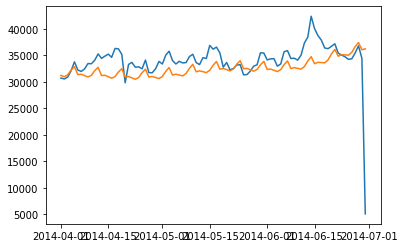

In [ ]:
plt.plot(df_user_test_stripped.set_index('ds'))
plt.plot(df_test_pred.set_index('date')['yhat'])

In [ ]:
mean_absolute_percentage_error(df_user_test_stripped[['y']], df_test_pred[['yhat']])

0.12538849517482148

In [ ]:
df_test_pred

,date,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,13844.463915,11097.874360,14171.895416,13844.463915,13844.463915,-1258.697164,-1258.697164,-1258.697164,-142.214192,-142.214192,-142.214192,-1116.482973,-1116.482973,-1116.482973,0.0,0.0,0.0,12585.766750
1,2014-04-02,13845.346436,10913.406761,13988.145857,13845.241195,13845.371889,-1362.529777,-1362.529777,-1362.529777,-242.419973,-242.419973,-242.419973,-1120.109805,-1120.109805,-1120.109805,0.0,0.0,0.0,12482.816659
2,2014-04-03,13846.228958,11208.125160,14329.458834,13845.819709,13846.491826,-1060.531521,-1060.531521,-1060.531521,63.797777,63.797777,63.797777,-1124.329298,-1124.329298,-1124.329298,0.0,0.0,0.0,12785.697437
3,2014-04-04,13847.111479,11209.555893,14386.425550,13846.314364,13847.699558,-1100.812776,-1100.812776,-1100.812776,28.398598,28.398598,28.398598,-1129.211375,-1129.211375,-1129.211375,0.0,0.0,0.0,12746.298703
4,2014-04-05,13847.994001,11402.502721,14352.694965,13846.472652,13848.944884,-944.635025,-944.635025,-944.635025,190.186889,190.186889,190.186889,-1134.821914,-1134.821914,-1134.821914,0.0,0.0,0.0,12903.358975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2014-06-26,13920.360760,12776.398096,15829.200891,13779.185087,14047.240768,359.236061,359.236061,359.236061,63.797777,63.797777,63.797777,295.438284,295.438284,295.438284,0.0,0.0,0.0,14279.596822
87,2014-06-27,13921.243282,12799.366374,15847.929472,13777.958408,14050.197946,424.073258,424.073258,424.073258,28.398598,28.398598,28.398598,395.674659,395.674659,395.674659,0.0,0.0,0.0,14345.316540
88,2014-06-28,13922.125803,12971.887258,16117.566197,13776.731728,14053.155124,685.243461,685.243461,685.243461,190.186889,190.186889,190.186889,495.056572,495.056572,495.056572,0.0,0.0,0.0,14607.369264
89,2014-06-29,13923.008325,13248.045284,16342.256978,13775.542393,14056.112302,874.831792,874.831792,874.831792,282.287166,282.287166,282.287166,592.544626,592.544626,592.544626,0.0,0.0,0.0,14797.840116


In [ ]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics


In [ ]:
df_cv = cross_validation(model, initial='365 days', period='90 days', horizon = '90 days')

INFO:prophet:Making 5 forecasts with cutoffs between 2013-01-05 00:00:00 and 2013-12-31 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/q94m01ex.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/cdah1fa4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74128', 'data', 'file=/tmp/tmpcn_yvaxi/q94m01ex.json', 'init=/tmp/tmpcn_yvaxi/cdah1fa4.json', 'output', 'file=/tmp/tmpcn_yvaxi/prophet_modelxsq0f70j/prophet_model-20221213221410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:14:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:14:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/hq2njrng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn_yvaxi/zm1h9px6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [ ]:
print(user)
df_p = performance_metrics(df_cv)
df_p

['MT_212']


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,9.392412e+06,3064.704213,1774.144340,0.059184,0.029317,0.054332,0.866667
1,10 days,4.122817e+06,2030.472064,1379.102385,0.037746,0.029317,0.038876,0.911111
2,11 days,3.634798e+06,1906.514633,1343.034538,0.037358,0.030094,0.038373,0.933333
3,12 days,2.390547e+06,1546.139441,1166.279553,0.033174,0.023990,0.033903,0.955556
4,13 days,2.311340e+06,1520.309018,1193.489010,0.034191,0.027061,0.034899,0.955556
...,...,...,...,...,...,...,...,...
77,86 days,1.145430e+07,3384.419632,1936.011114,0.067008,0.029437,0.059912,0.822222
78,87 days,1.155961e+07,3399.943033,1941.031408,0.067089,0.027188,0.059996,0.822222
79,88 days,1.147086e+07,3386.866463,1918.171839,0.066647,0.025588,0.059478,0.822222
80,89 days,1.185518e+07,3443.134650,1986.996083,0.068434,0.027176,0.061373,0.800000


In [ ]:
print(user)
df_p = performance_metrics(df_cv)
df_p

['MT_303']


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,2.012041e+06,1418.464199,1104.235030,0.076932,0.070484,0.079693,0.644444
1,10 days,1.904824e+06,1380.153785,1064.597047,0.071286,0.064630,0.075557,0.644444
2,11 days,1.887212e+06,1373.758473,1067.742072,0.071774,0.064630,0.076036,0.644444
3,12 days,1.909050e+06,1381.683848,1100.453187,0.074398,0.075403,0.078802,0.600000
4,13 days,1.962328e+06,1400.831120,1140.163054,0.077289,0.081745,0.081852,0.600000
...,...,...,...,...,...,...,...,...
77,86 days,6.241281e+06,2498.255582,1977.989265,0.140212,0.148753,0.145743,0.422222
78,87 days,6.061124e+06,2461.935033,1952.671600,0.138355,0.151841,0.144123,0.400000
79,88 days,5.901548e+06,2429.310249,1919.748280,0.136271,0.151841,0.141919,0.400000
80,89 days,5.712470e+06,2390.077412,1878.952721,0.133793,0.151841,0.139285,0.400000
